<a href="https://colab.research.google.com/github/Gerlinde888/Gerlinde888.github.io/blob/master/Copy_of_Copy_of_forecasting_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting with Prophet

In [0]:
# Install mwviews (needed to access Wikipedia article views data)
from IPython.display import clear_output

!pip install mwviews

clear_output()

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from mwviews.api import PageviewsClient
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Get input data

In [0]:
# Load data: page views of wikipedia site
p = PageviewsClient(user_agent="info@female-coders.at Prophet time series forecasting example")

# TODO: add a wikipedia topic you want to load data for, and a start date
article_views = p.article_views('en.wikipedia', ['Wolfgang Amadeus Mozart', 'Austria'] , 
                                granularity='monthly', 
                                start='20150701', end='20200430' )
df_article_views = pd.DataFrame(article_views).T.sort_index()
df_article_views.head()

,Wolfgang_Amadeus_Mozart,Austria
2015-07-01,181376,218090
2015-08-01,202568,226018
2015-09-01,249539,279892
2015-10-01,246551,215564
2015-11-01,264078,220927


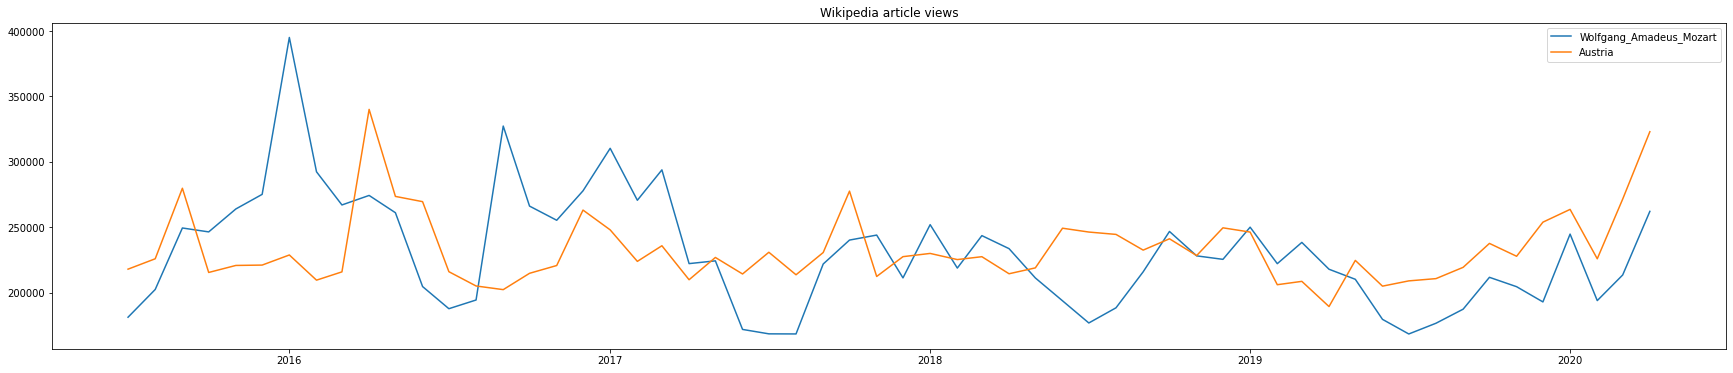

In [0]:
# First view on the data
fig = plt.figure(figsize=(30, 6))
plt.plot(df_article_views)
plt.legend(df_article_views.columns)
plt.title('Wikipedia article views')
plt.show()

## Prepare dataframe

In [0]:
# let's use Wolfgang Amadeus Mozart's page views
# input data needs column ds (time) and y 

# TODO: provide correct column names
df_input = pd.DataFrame({ 
    'ds': df_article_views.index, 
    'y': df_article_views['Wolfgang_Amadeus_Mozart']
})
df_input.head()


,ds,y
2015-07-01,2015-07-01,181376
2015-08-01,2015-08-01,202568
2015-09-01,2015-09-01,249539
2015-10-01,2015-10-01,246551
2015-11-01,2015-11-01,264078


In [0]:
# Define what data we want to use for training and test

# TODO: Add a proper test length
test_len = 6 # months
train, test = df_input[:-test_len], df_input[-test_len:]

print(f'Training size: {len(train)}')
print(f'Test size: {test_len}')

Training size: 52
Test size: 6


### Train Model

In [0]:
model = Prophet(seasonality_prior_scale= 0.0025 )

model.fit(train)

# if you are more interested in more details, have a look at the parameters
# model.params

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
# if you have daily data, you might want to include holidays, 
#    e.g. birthday, Salzburger Festspiele,...

# mozart_birthday = pd.DataFrame({
#   'holiday': 'mozart_birthday',
#   'ds': pd.to_datetime(['2018-01-27', '2019-01-27', '2020-01-27']),
#   'lower_window': 0,
#   'upper_window': 1,
# })
# model = Prophet( 
#       interval_width=0.95, 
#       seasonality_prior_scale=0.025,
#       holidays=mozart_birthday,
# )

In [0]:
# Create a 'future' dataframe 

# TODO add the number of periods you want to predict for (=test length)
df_future = model.make_future_dataframe(periods=test_len, freq = 'M')
df_future.tail()

,ds
53,2019-11-30
54,2019-12-31
55,2020-01-31
56,2020-02-29
57,2020-03-31


## Predict the future ✨

In [0]:
# predict the future

# TODO: provide your future dataframe
df_forecast = model.predict(df_future)
df_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-01,265995.425093,218463.965437,317711.485929,265995.425093,265995.425093,-1482.258219,-1482.258219,-1482.258219,-1482.258219,-1482.258219,-1482.258219,0.0,0.0,0.0,264513.166873
1,2015-08-01,264647.207569,214140.984254,317925.933174,264647.207569,264647.207569,-1159.445001,-1159.445001,-1159.445001,-1159.445001,-1159.445001,-1159.445001,0.0,0.0,0.0,263487.762568
2,2015-09-01,263298.990045,211780.086396,314280.114118,263298.990045,263298.990045,641.247904,641.247904,641.247904,641.247904,641.247904,641.247904,0.0,0.0,0.0,263940.237949
3,2015-10-01,261994.263408,214787.964146,315377.401563,261994.263408,261994.263408,447.820957,447.820957,447.820957,447.820957,447.820957,447.820957,0.0,0.0,0.0,262442.084365
4,2015-11-01,260646.045883,205648.129361,306091.045600,260646.045883,260646.045883,54.734149,54.734149,54.734149,54.734149,54.734149,54.734149,0.0,0.0,0.0,260700.780033
5,2015-12-01,259341.319247,209204.768892,306618.415333,259341.319247,259341.319247,-142.910377,-142.910377,-142.910377,-142.910377,-142.910377,-142.910377,0.0,0.0,0.0,259198.408870
6,2016-01-01,257993.101721,206357.461938,307483.710812,257993.101721,257993.101721,1373.465652,1373.465652,1373.465652,1373.465652,1373.465652,1373.465652,0.0,0.0,0.0,259366.567373
7,2016-02-01,256644.884196,205767.205528,309360.813824,256644.884196,256644.884196,-76.258806,-76.258806,-76.258806,-76.258806,-76.258806,-76.258806,0.0,0.0,0.0,256568.625390
8,2016-03-01,255383.648446,202596.442887,305650.185100,255383.648446,255383.648446,513.575968,513.575968,513.575968,513.575968,513.575968,513.575968,0.0,0.0,0.0,255897.224414
9,2016-04-01,254035.430920,204784.342486,304431.896911,254035.430920,254035.430920,199.166752,199.166752,199.166752,199.166752,199.166752,199.166752,0.0,0.0,0.0,254234.597673


## Inspect your prediction

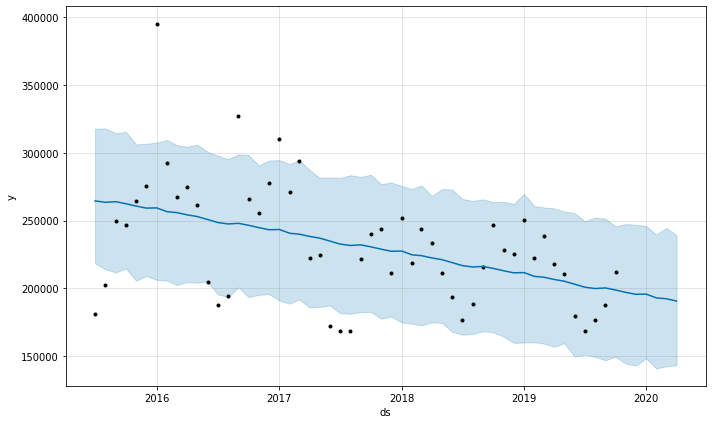

In [0]:
# have a look at your forecast
model.plot(df_forecast).show()

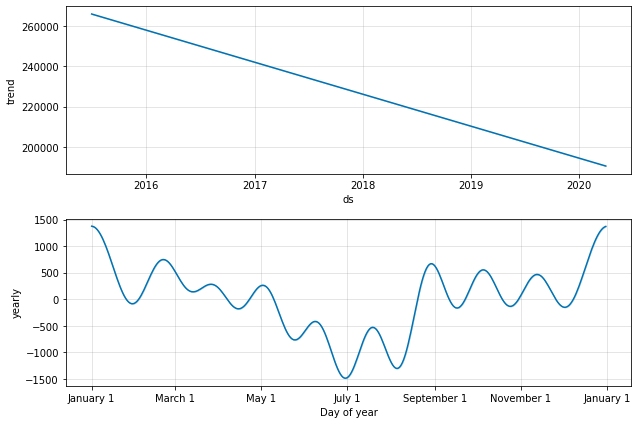

In [0]:
# inspect the model components (trend, saisonalities)
model.plot_components(df_forecast).show()

In [0]:
# How does the forecast dataframe look like? What information can you get out of it?

# TODO: look only at the timeframe you predicted
predicted = df_forecast[-test_len:]
predicted.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
52,2019-10-31,197149.292042,144604.329678,247473.252549,197149.292007,197149.292071,10.047895,10.047895,10.047895,10.047895,10.047895,10.047895,0.0,0.0,0.0,197159.339937
53,2019-11-30,195844.564022,143221.206011,246942.207476,195844.563846,195844.564208,-126.881017,-126.881017,-126.881017,-126.881017,-126.881017,-126.881017,0.0,0.0,0.0,195717.683006
54,2019-12-31,194496.345069,148504.442716,246015.084234,194496.344660,194496.345494,1365.049672,1365.049672,1365.049672,1365.049672,1365.049672,1365.049672,0.0,0.0,0.0,195861.394741
55,2020-01-31,193148.126115,141015.165865,239789.190552,193148.125453,193148.126783,-84.340642,-84.340642,-84.340642,-84.340642,-84.340642,-84.340642,0.0,0.0,0.0,193063.785473
56,2020-02-29,191886.889029,142657.616777,244592.612464,191886.888110,191886.889951,558.080445,558.080445,558.080445,558.080445,558.080445,558.080445,0.0,0.0,0.0,192444.969474


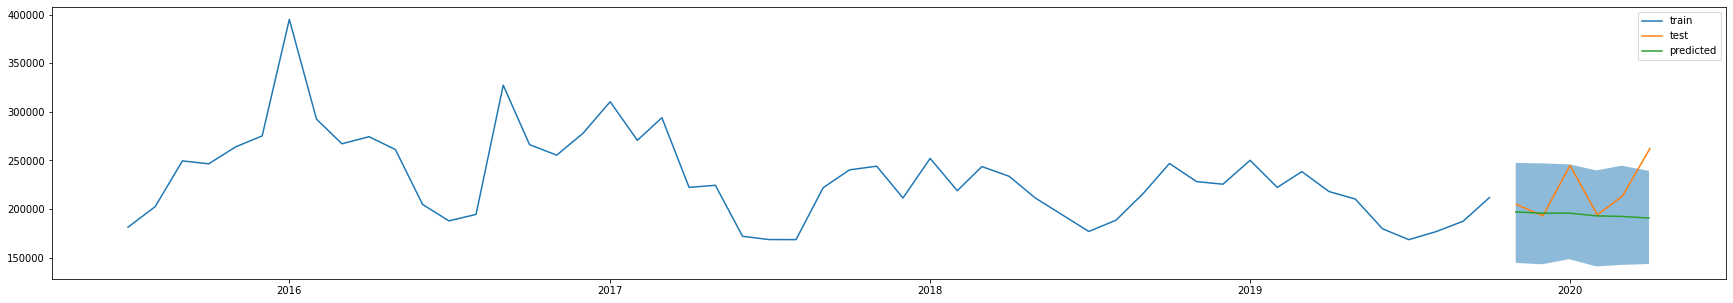

In [0]:
# plot training and test

fig =plt.figure(figsize=(30, 5))
plt.plot(train['ds'], train['y'], label='train')
plt.plot(test['ds'], test['y'], label='test')

plt.plot(predicted ['ds'], predicted ['yhat'], label='predicted')
plt.fill_between (predicted['ds'], predicted['yhat_lower'], predicted['yhat_upper'], alpha=0.5)
# TODO: add your prediction to the plot (also include the confidence interval)

plt.legend()
plt.show()

## Calculate Error Metrics

In [0]:
print('Error')
print('---')
print('Train')
print('MAE', mean_absolute_error(y_true=train['y'], y_pred=df_forecast[:-test_len]['yhat']))
print('RMSE', mean_squared_error(y_true=train['y'], y_pred=df_forecast[:-test_len]['yhat'], squared=False))
print('-')
print('Test')

# TODO: calculate the error metrics for the test set
print('MAE', mean_absolute_error(y_true=test['y'], y_pred=predicted['yhat']))
print('RMSE',mean_squared_error(y_true=test['y'], y_pred=predicted['yhat'] , squared=False))
print('---')

Error
---
Train
MAE 29955.573796581575
RMSE 39359.70069211178
-
Test
MAE 25479.06935124182
RMSE 36569.4515465887
---


In [0]:
# TODO: can we improve the model?